# HighDimDirectLiNGAM

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam import HighDimDirectLiNGAM
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

['1.24.4', '2.0.3', '0.20.1', '1.8.3']


## Test data
We create test data consisting of 6 variables.

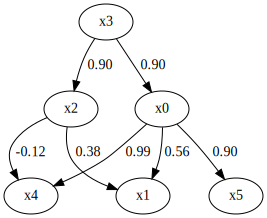

,0,1,2,3,4,5
0,-1.245034,-2.070303,-1.684946,-1.466231,-0.607202,-1.208680
1,-0.129694,-0.453755,-0.525306,0.238720,-0.770446,0.214530
2,-0.426608,0.434575,-0.070464,-0.346001,-0.891935,0.060805
3,-0.058363,-0.412667,0.134419,-0.661997,-0.661361,0.382801
4,0.560928,0.631961,1.636429,1.484039,0.757059,0.526978


In [2]:
m = np.array([
    [ 0.000,  0.000,  0.000,  0.895,  0.000,  0.000],
    [ 0.565,  0.000,  0.377,  0.000,  0.000,  0.000],
    [ 0.000,  0.000,  0.000,  0.895,  0.000,  0.000],
    [ 0.000,  0.000,  0.000,  0.000,  0.000,  0.000],
    [ 0.991,  0.000, -0.124,  0.000,  0.000,  0.000],
    [ 0.895,  0.000,  0.000,  0.000,  0.000,  0.000]
])

generate_error = lambda p: np.random.uniform(-p, p, size=1000)

error_vars = [0.2, 0.2, 0.2, 1.0, 0.2, 0.2]
params = [0.5 * np.sqrt(12 * v) for v in error_vars]
e = np.array([generate_error(p) for p in params])

X = np.linalg.pinv(np.eye(len(m)) - m) @ e
X = pd.DataFrame(X.T)

display(make_dot(m))

X.head()

## Causal Discovery
To run causal discovery, we create a `HighDimDirectLiNGAM` object and call the `fit` method.

In [3]:
model = HighDimDirectLiNGAM()
model.fit(X)

Using the `causal_order_` properties, we can see the causal ordering as a result of the causal discovery.

In [4]:
model.causal_order_

[3, 2, 0, 4, 1, 5]

Also, using the `adjacency_matrix_` properties, we can see the adjacency matrix as a result of the causal discovery.

In [5]:
model.adjacency_matrix_

array([[ 0.   ,  0.   ,  0.   ,  0.87 ,  0.   ,  0.   ],
       [ 0.535,  0.   ,  0.411,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.894,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.937,  0.   , -0.103,  0.   ,  0.   ,  0.   ],
       [ 0.875,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

We can draw a causal graph by utility funciton.

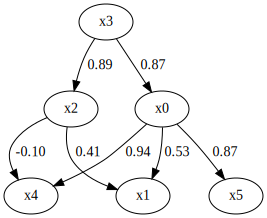

In [6]:
make_dot(model.adjacency_matrix_)